In [1]:
import tensorflow as tf
print (tf.__version__)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

1.14.0


/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

In [2]:
import os
import pickle
import PIL.Image
import numpy as np
import dnnlib
import dnnlib.tflib as tflib
import config
from encoder.generator_model import Generator

import matplotlib.pyplot as plt
%matplotlib inline

W0415 07:06:03.850451 140539932923712 deprecation_wrapper.py:119] From /home/mylee/stylegan-encoder-master-got/dnnlib/tflib/tfutil.py:34: The name tf.Dimension is deprecated. Please use tf.compat.v1.Dimension instead.

W0415 07:06:03.851852 140539932923712 deprecation_wrapper.py:119] From /home/mylee/stylegan-encoder-master-got/dnnlib/tflib/tfutil.py:74: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W0415 07:06:03.852760 140539932923712 deprecation_wrapper.py:119] From /home/mylee/stylegan-encoder-master-got/dnnlib/tflib/tfutil.py:128: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.



In [3]:
URL_FFHQ = 'https://s3-us-west-2.amazonaws.com/nanonets/blogs/karras2019stylegan-ffhq-1024x1024.pkl'

tflib.init_tf()
with dnnlib.util.open_url(URL_FFHQ, cache_dir=config.cache_dir) as f:
    generator_network, discriminator_network, Gs = pickle.load(f)

generator = Generator(Gs, batch_size=1, randomize_noise=False)

W0415 07:06:08.052705 140539932923712 deprecation_wrapper.py:119] From /home/mylee/stylegan-encoder-master-got/dnnlib/tflib/tfutil.py:97: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0415 07:06:08.054831 140539932923712 deprecation_wrapper.py:119] From /home/mylee/stylegan-encoder-master-got/dnnlib/tflib/tfutil.py:109: The name tf.set_random_seed is deprecated. Please use tf.compat.v1.set_random_seed instead.

W0415 07:06:13.119823 140539932923712 deprecation.py:323] From <string>:364: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [4]:
def generate_image(latent_vector):
    latent_vector = latent_vector.reshape((1, 18, 512))
    generator.set_dlatents(latent_vector)
    img_array = generator.generate_images()[0]
    img = PIL.Image.fromarray(img_array, 'RGB')
    #return img
    return img.resize((256, 256))

def move_and_show(latent_vector, direction, coeffs):
    fig,ax = plt.subplots(1, len(coeffs), figsize=(15, 10), dpi=80)
    for i, coeff in enumerate(coeffs):
        new_latent_vector = latent_vector.copy()
        new_latent_vector[:8] = (latent_vector + coeff*direction)[:8]
        ax[i].imshow(generate_image(new_latent_vector))
        ax[i].set_title('Coeff: %0.1f' % coeff)
    [x.axis('off') for x in ax]
    plt.show()

In [5]:
# pretrained latent directions
smile_direction = np.load('ffhq_dataset/latent_directions/smile.npy')
gender_direction = np.load('ffhq_dataset/latent_directions/gender.npy')
age_direction = np.load('ffhq_dataset/latent_directions/age.npy')

In [6]:
# !rm -r 'raw_images'
# !rm -r 'aligned_images'
# !rm -r 'generated_images'

In [7]:
os.mkdir('raw_images')
os.mkdir('aligned_images')
os.mkdir('generated_images')

In [8]:
# Then, run these scripts

# 1) Extract and align faces from images
!python align_images.py raw_images/ aligned_images/

# 2) Find latent representation of aligned images
!python encode_images.py aligned_images/ generated_images/ latent_representations/

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

W0415 07:10:34.158774 139650542524224 deprecation.py:323] From <string>:364: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
2020-04-15 07:10:42.291685: W tensorflow/core/common_runtime/bfc_allocator.cc:237] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.07GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2020-04-15 07:10:42.298945: W tensorflow/core/common_runtime/bfc_allocator.cc:237] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.07GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2020-04-15 07:10:42.302459: W tensorflow/core/common_runtime/bfc_allocator.cc:237] Alloca

greta_01 Loss: 0.96:   7%|█▍                  | 71/1000 [00:11<01:42,  9.10it/s]


greta_01 Loss: 0.87:  12%|██▎                | 120/1000 [00:16<01:38,  8.96it/s]


greta_01 Loss: 0.79:  17%|███▏               | 169/1000 [00:22<01:31,  9.10it/s]


greta_01 Loss: 0.72:  22%|████▏              | 218/1000 [00:27<01:26,  9.06it/s]


greta_01 Loss: 0.65:  27%|█████              | 267/1000 [00:33<01:21,  9.01it/s]


greta_01 Loss: 0.61:  32%|██████             | 316/1000 [00:38<01:15,  9.09it/s]


greta_01 Loss: 0.54:  36%|██████▉            | 365/1000 [00:43<01:10,  9.05it/s]


greta_01 Loss: 0.55:  41%|███████▊           | 414/1000 [00:49<01:04,  9.06it/s]


greta_01 Loss: 0.51:  46%|████████▊          | 463/1000 [00:54<00:59,  9.02it/s]


greta_01 Loss: 0.54:  51%|█████████▋         | 512/1000 [01:00<00:53,  9.06it/s]


greta_01 Loss: 0.49:  56%|██████████▋        | 561/1000 [01:05<00:48,  8.97it/s]


greta_01 Loss: 0.49:  61%|███████████▌       | 610/1000 [01:11<00:43,  9.05it/s]


greta_01 Loss: 0.44:  66%|████████████▌      | 659/1000 [01:16<00:38,  8.90it/s]


greta_01 Loss: 0.44:  71%|█████████████▍     | 708/1000 [01:21<00:32,  9.04it/s]


greta_01 Loss: 0.44:  76%|██████████████▍    | 757/1000 [01:27<00:26,  9.02it/s]


greta_01 Loss: 0.43:  81%|███████████████▎   | 806/1000 [01:32<00:21,  9.01it/s]


greta_01 Loss: 0.44:  86%|████████████████▏  | 855/1000 [01:38<00:16,  9.02it/s]


greta_01 Loss: 0.40:  90%|█████████████████▏ | 904/1000 [01:43<00:10,  9.04it/s]


greta_01 Loss: 0.40:  95%|██████████████████ | 953/1000 [01:49<00:05,  9.02it/s]


greta_01 Loss: 0.43: 100%|██████████████████| 1000/1000 [01:54<00:00,  8.95it/s]
                                                                                greta_01  loss: 0.4276068
dtrump_01 Loss: 1.61:   5%|▉                  | 49/1000 [00:08<01:45,  8.98it/s]


dtrump_01 Loss: 1.39:  10%|█▊                 | 98/1000 [00:14<01:40,  8.98it/s]


dtrump_01 Loss: 1.22:  15%|██▋               | 147/1000 [00:19<01:34,  9.00it/s]


dtrump_01 Loss: 1.16:  20%|███▌              | 196/1000 [00:24<01:29,  9.02it/s]


dtrump_01 Loss: 1.08:  24%|████▍             | 245/1000 [00:30<01:23,  8.99it/s]


dtrump_01 Loss: 0.99:  29%|█████▎            | 294/1000 [00:35<01:18,  9.01it/s]


dtrump_01 Loss: 0.86:  34%|██████▏           | 343/1000 [00:41<01:12,  9.02it/s]


dtrump_01 Loss: 0.81:  39%|███████           | 392/1000 [00:46<01:07,  9.00it/s]


dtrump_01 Loss: 0.78:  44%|███████▉          | 441/1000 [00:52<01:02,  8.97it/s]


dtrump_01 Loss: 0.74:  49%|████████▊         | 490/1000 [00:57<00:56,  9.02it/s]


dtrump_01 Loss: 0.69:  54%|█████████▋        | 539/1000 [01:03<00:51,  9.02it/s]


dtrump_01 Loss: 0.70:  59%|██████████▌       | 588/1000 [01:08<00:45,  8.98it/s]


dtrump_01 Loss: 0.66:  64%|███████████▍      | 637/1000 [01:13<00:40,  9.03it/s]


dtrump_01 Loss: 0.63:  69%|████████████▎     | 686/1000 [01:19<00:34,  8.99it/s]


dtrump_01 Loss: 0.62:  74%|█████████████▏    | 735/1000 [01:24<00:29,  9.02it/s]


dtrump_01 Loss: 0.63:  78%|██████████████    | 784/1000 [01:30<00:23,  9.01it/s]


dtrump_01 Loss: 0.58:  83%|██████████████▉   | 833/1000 [01:35<00:18,  8.98it/s]


dtrump_01 Loss: 0.58:  88%|███████████████▉  | 882/1000 [01:41<00:13,  8.98it/s]


dtrump_01 Loss: 0.54:  93%|████████████████▊ | 931/1000 [01:46<00:07,  9.00it/s]


dtrump_01 Loss: 0.50:  98%|█████████████████▋| 980/1000 [01:52<00:02,  9.00it/s]


dtrump_01 Loss: 0.58: 100%|█████████████████| 1000/1000 [01:54<00:00,  8.98it/s]
                                                                                dtrump_01  loss: 0.58370066
heng_01 Loss: 1.59:   8%|█▌                   | 76/1000 [00:11<01:42,  9.03it/s]


heng_01 Loss: 1.40:  12%|██▌                 | 125/1000 [00:16<01:36,  9.03it/s]


heng_01 Loss: 1.13:  17%|███▍                | 174/1000 [00:22<01:31,  9.01it/s]


heng_01 Loss: 1.00:  22%|████▍               | 223/1000 [00:27<01:26,  9.02it/s]


heng_01 Loss: 0.89:  27%|█████▍              | 272/1000 [00:33<01:20,  9.02it/s]


heng_01 Loss: 0.86:  32%|██████▍             | 321/1000 [00:38<01:15,  9.02it/s]


heng_01 Loss: 0.80:  37%|███████▍            | 370/1000 [00:44<01:09,  9.01it/s]


heng_01 Loss: 0.79:  42%|████████▍           | 419/1000 [00:49<01:04,  9.03it/s]


heng_01 Loss: 0.80:  47%|█████████▎          | 468/1000 [00:54<00:58,  9.02it/s]


heng_01 Loss: 0.71:  52%|██████████▎         | 517/1000 [01:00<00:53,  8.98it/s]


heng_01 Loss: 0.69:  57%|███████████▎        | 566/1000 [01:05<00:48,  8.98it/s]


heng_01 Loss: 0.65:  62%|████████████▎       | 615/1000 [01:11<00:42,  9.00it/s]


heng_01 Loss: 0.67:  66%|█████████████▎      | 664/1000 [01:16<00:37,  8.96it/s]


heng_01 Loss: 0.63:  71%|██████████████▎     | 713/1000 [01:22<00:31,  8.99it/s]


heng_01 Loss: 0.62:  76%|███████████████▏    | 762/1000 [01:27<00:26,  9.00it/s]


heng_01 Loss: 0.60:  81%|████████████████▏   | 811/1000 [01:33<00:21,  8.99it/s]


heng_01 Loss: 0.57:  86%|█████████████████▏  | 860/1000 [01:38<00:15,  8.96it/s]


heng_01 Loss: 0.57:  91%|██████████████████▏ | 909/1000 [01:44<00:10,  9.01it/s]


heng_01 Loss: 0.55:  96%|███████████████████▏| 958/1000 [01:49<00:04,  9.00it/s]


heng_01 Loss: 0.60: 100%|███████████████████| 1000/1000 [01:54<00:00,  8.92it/s]
                                                                                heng_01  loss: 0.60456187
Kaileng_01 Loss: 0.87:   5%|▉                 | 54/1000 [00:09<01:44,  9.03it/s]


Kaileng_01 Loss: 0.73:  10%|█▊               | 103/1000 [00:14<01:39,  8.97it/s]


Kaileng_01 Loss: 0.69:  15%|██▌              | 152/1000 [00:20<01:34,  8.98it/s]


Kaileng_01 Loss: 0.58:  20%|███▍             | 201/1000 [00:25<01:28,  9.02it/s]


Kaileng_01 Loss: 0.55:  25%|████▎            | 250/1000 [00:31<01:23,  8.99it/s]


Kaileng_01 Loss: 0.51:  30%|█████            | 299/1000 [00:36<01:17,  9.02it/s]


Kaileng_01 Loss: 0.57:  35%|█████▉           | 348/1000 [00:41<01:12,  9.01it/s]


Kaileng_01 Loss: 0.45:  40%|██████▋          | 397/1000 [00:47<01:07,  8.98it/s]


Kaileng_01 Loss: 0.46:  45%|███████▌         | 446/1000 [00:52<01:01,  8.98it/s]


Kaileng_01 Loss: 0.44:  50%|████████▍        | 495/1000 [00:58<00:56,  9.01it/s]


Kaileng_01 Loss: 0.45:  54%|█████████▏       | 544/1000 [01:03<00:50,  9.00it/s]


Kaileng_01 Loss: 0.46:  59%|██████████       | 593/1000 [01:09<00:45,  8.98it/s]


Kaileng_01 Loss: 0.40:  64%|██████████▉      | 642/1000 [01:14<00:39,  9.02it/s]


Kaileng_01 Loss: 0.38:  69%|███████████▋     | 691/1000 [01:20<00:34,  8.99it/s]


Kaileng_01 Loss: 0.40:  74%|████████████▌    | 740/1000 [01:25<00:29,  8.96it/s]


Kaileng_01 Loss: 0.38:  79%|█████████████▍   | 789/1000 [01:31<00:23,  9.01it/s]


Kaileng_01 Loss: 0.34:  84%|██████████████▏  | 838/1000 [01:36<00:18,  8.94it/s]


Kaileng_01 Loss: 0.35:  89%|███████████████  | 887/1000 [01:42<00:12,  8.97it/s]


Kaileng_01 Loss: 0.32:  94%|███████████████▉ | 936/1000 [01:47<00:07,  8.87it/s]


Kaileng_01 Loss: 0.35:  98%|████████████████▋| 985/1000 [01:52<00:01,  9.01it/s]


Kaileng_01 Loss: 0.43: 100%|████████████████| 1000/1000 [01:54<00:00,  8.98it/s]
                                                                                Kaileng_01  loss: 0.42844895
ssun_01 Loss: 1.68:   8%|█▋                   | 81/1000 [00:12<01:42,  9.00it/s]


ssun_01 Loss: 1.55:  13%|██▌                 | 130/1000 [00:17<01:36,  9.01it/s]


ssun_01 Loss: 1.51:  18%|███▌                | 179/1000 [00:23<01:31,  8.98it/s]


ssun_01 Loss: 1.32:  23%|████▌               | 228/1000 [00:28<01:26,  8.97it/s]


ssun_01 Loss: 1.27:  28%|█████▌              | 277/1000 [00:33<01:20,  9.02it/s]


ssun_01 Loss: 1.19:  33%|██████▌             | 326/1000 [00:39<01:14,  9.06it/s]


ssun_01 Loss: 1.13:  38%|███████▌            | 375/1000 [00:44<01:09,  9.02it/s]


ssun_01 Loss: 1.07:  42%|████████▍           | 424/1000 [00:50<01:04,  8.99it/s]


ssun_01 Loss: 1.10:  47%|█████████▍          | 473/1000 [00:55<00:58,  8.95it/s]


ssun_01 Loss: 1.08:  52%|██████████▍         | 522/1000 [01:01<00:52,  9.03it/s]


ssun_01 Loss: 1.05:  57%|███████████▍        | 571/1000 [01:06<00:47,  8.99it/s]


ssun_01 Loss: 0.98:  62%|████████████▍       | 620/1000 [01:12<00:42,  8.98it/s]


ssun_01 Loss: 0.93:  67%|█████████████▍      | 669/1000 [01:17<00:36,  8.97it/s]


ssun_01 Loss: 0.95:  72%|██████████████▎     | 718/1000 [01:23<00:31,  9.00it/s]


ssun_01 Loss: 0.86:  77%|███████████████▎    | 767/1000 [01:28<00:25,  9.00it/s]


ssun_01 Loss: 0.87:  82%|████████████████▎   | 816/1000 [01:33<00:20,  8.99it/s]


ssun_01 Loss: 0.79:  86%|█████████████████▎  | 865/1000 [01:39<00:15,  9.00it/s]


ssun_01 Loss: 0.87:  91%|██████████████████▎ | 914/1000 [01:44<00:09,  9.01it/s]


ssun_01 Loss: 0.78:  96%|███████████████████▎| 963/1000 [01:50<00:04,  8.98it/s]


ssun_01 Loss: 0.72: 100%|███████████████████| 1000/1000 [01:54<00:00,  9.01it/s]
                                                                                ssun_01  loss: 0.7244517
xi_01 Loss: 1.47:   6%|█▎                     | 59/1000 [00:10<01:43,  9.06it/s]


xi_01 Loss: 1.34:  11%|██▍                   | 108/1000 [00:15<01:38,  9.05it/s]


xi_01 Loss: 1.28:  16%|███▍                  | 157/1000 [00:20<01:32,  9.07it/s]


xi_01 Loss: 1.19:  21%|████▌                 | 206/1000 [00:26<01:27,  9.05it/s]


xi_01 Loss: 1.09:  26%|█████▌                | 255/1000 [00:31<01:23,  8.95it/s]


xi_01 Loss: 1.05:  30%|██████▋               | 304/1000 [00:37<01:17,  8.97it/s]


xi_01 Loss: 1.01:  35%|███████▊              | 353/1000 [00:42<01:11,  9.01it/s]


xi_01 Loss: 0.99:  40%|████████▊             | 402/1000 [00:48<01:06,  9.03it/s]


xi_01 Loss: 0.93:  45%|█████████▉            | 451/1000 [00:53<01:00,  9.01it/s]


xi_01 Loss: 0.86:  50%|███████████           | 500/1000 [00:58<00:55,  9.03it/s]


xi_01 Loss: 0.85:  55%|████████████          | 549/1000 [01:04<00:50,  8.97it/s]


xi_01 Loss: 0.81:  60%|█████████████▏        | 598/1000 [01:09<00:44,  9.00it/s]


xi_01 Loss: 0.80:  65%|██████████████▏       | 647/1000 [01:15<00:39,  9.02it/s]


xi_01 Loss: 0.80:  70%|███████████████▎      | 696/1000 [01:20<00:34,  8.93it/s]


xi_01 Loss: 0.78:  74%|████████████████▍     | 745/1000 [01:26<00:28,  9.03it/s]


xi_01 Loss: 0.77:  79%|█████████████████▍    | 794/1000 [01:31<00:23,  8.87it/s]


xi_01 Loss: 0.70:  84%|██████████████████▌   | 843/1000 [01:37<00:17,  8.99it/s]


xi_01 Loss: 0.69:  89%|███████████████████▌  | 892/1000 [01:42<00:11,  9.01it/s]


xi_01 Loss: 0.68:  94%|████████████████████▋ | 941/1000 [01:47<00:06,  8.99it/s]


xi_01 Loss: 0.69:  99%|█████████████████████▊| 990/1000 [01:53<00:01,  8.99it/s]


xi_01 Loss: 0.63: 100%|█████████████████████| 1000/1000 [01:54<00:00,  9.02it/s]
                                                                                xi_01  loss: 0.6328735
lhl_01 Loss: 1.02:   9%|█▉                    | 86/1000 [00:12<01:41,  9.01it/s]


lhl_01 Loss: 0.89:  14%|██▊                  | 135/1000 [00:18<01:35,  9.03it/s]


lhl_01 Loss: 0.79:  18%|███▊                 | 184/1000 [00:23<01:30,  9.02it/s]


lhl_01 Loss: 0.84:  23%|████▉                | 233/1000 [00:29<01:25,  9.00it/s]


lhl_01 Loss: 0.69:  28%|█████▉               | 282/1000 [00:34<01:19,  8.99it/s]


lhl_01 Loss: 0.63:  33%|██████▉              | 331/1000 [00:40<01:14,  8.96it/s]


lhl_01 Loss: 0.63:  38%|███████▉             | 380/1000 [00:45<01:09,  8.93it/s]


lhl_01 Loss: 0.62:  43%|█████████            | 429/1000 [00:51<01:03,  9.03it/s]


lhl_01 Loss: 0.54:  48%|██████████           | 478/1000 [00:56<00:58,  8.99it/s]


lhl_01 Loss: 0.56:  53%|███████████          | 527/1000 [01:01<00:52,  8.96it/s]


lhl_01 Loss: 0.54:  58%|████████████         | 576/1000 [01:07<00:47,  8.98it/s]


lhl_01 Loss: 0.49:  62%|█████████████▏       | 625/1000 [01:12<00:41,  8.97it/s]


lhl_01 Loss: 0.45:  67%|██████████████▏      | 674/1000 [01:18<00:36,  8.97it/s]


lhl_01 Loss: 0.43:  72%|███████████████▏     | 723/1000 [01:23<00:30,  8.95it/s]


lhl_01 Loss: 0.45:  77%|████████████████▏    | 772/1000 [01:29<00:25,  9.00it/s]


lhl_01 Loss: 0.42:  82%|█████████████████▏   | 821/1000 [01:34<00:20,  8.91it/s]


lhl_01 Loss: 0.39:  87%|██████████████████▎  | 870/1000 [01:40<00:14,  9.00it/s]


lhl_01 Loss: 0.40:  92%|███████████████████▎ | 919/1000 [01:45<00:08,  9.01it/s]


lhl_01 Loss: 0.37:  97%|████████████████████▎| 968/1000 [01:51<00:03,  8.93it/s]


lhl_01 Loss: 0.36: 100%|████████████████████| 1000/1000 [01:54<00:00,  8.96it/s]
                                                                                lhl_01  loss: 0.35526899
heber_01 Loss: 2.01:   6%|█▎                  | 64/1000 [00:10<01:44,  8.96it/s]


heber_01 Loss: 1.87:  11%|██▏                | 113/1000 [00:16<01:38,  9.01it/s]


heber_01 Loss: 1.79:  16%|███                | 162/1000 [00:21<01:32,  9.01it/s]


heber_01 Loss: 1.65:  21%|████               | 211/1000 [00:26<01:27,  9.00it/s]


heber_01 Loss: 1.64:  26%|████▉              | 260/1000 [00:32<01:22,  9.00it/s]


heber_01 Loss: 1.62:  31%|█████▊             | 309/1000 [00:37<01:16,  8.99it/s]


heber_01 Loss: 1.49:  36%|██████▊            | 358/1000 [00:43<01:11,  9.01it/s]


heber_01 Loss: 1.39:  41%|███████▋           | 407/1000 [00:48<01:06,  8.96it/s]


heber_01 Loss: 1.33:  46%|████████▋          | 456/1000 [00:54<01:00,  8.97it/s]


heber_01 Loss: 1.30:  50%|█████████▌         | 505/1000 [00:59<00:55,  8.96it/s]


heber_01 Loss: 1.22:  55%|██████████▌        | 554/1000 [01:05<00:50,  8.92it/s]


heber_01 Loss: 1.19:  60%|███████████▍       | 603/1000 [01:10<00:44,  8.98it/s]


heber_01 Loss: 1.20:  65%|████████████▍      | 652/1000 [01:16<00:38,  8.95it/s]


heber_01 Loss: 1.16:  70%|█████████████▎     | 701/1000 [01:21<00:33,  8.99it/s]


heber_01 Loss: 1.09:  75%|██████████████▎    | 750/1000 [01:27<00:27,  8.99it/s]


heber_01 Loss: 1.09:  80%|███████████████▏   | 799/1000 [01:32<00:22,  8.95it/s]


heber_01 Loss: 1.06:  85%|████████████████   | 848/1000 [01:38<00:17,  8.93it/s]


heber_01 Loss: 1.04:  90%|█████████████████  | 897/1000 [01:43<00:11,  8.95it/s]


heber_01 Loss: 1.05:  95%|█████████████████▉ | 946/1000 [01:49<00:06,  8.92it/s]


heber_01 Loss: 0.99: 100%|██████████████████▉| 995/1000 [01:54<00:00,  8.92it/s]


heber_01 Loss: 1.05: 100%|██████████████████| 1000/1000 [01:55<00:00,  8.95it/s]
                                                                                heber_01  loss: 1.0462619
obama_01 Loss: 0.97:   9%|█▊                  | 91/1000 [00:13<01:41,  8.97it/s]


obama_01 Loss: 0.90:  14%|██▋                | 140/1000 [00:19<01:35,  8.96it/s]


obama_01 Loss: 0.77:  19%|███▌               | 189/1000 [00:24<01:30,  8.92it/s]


obama_01 Loss: 0.73:  24%|████▌              | 238/1000 [00:30<01:24,  8.97it/s]


obama_01 Loss: 0.68:  29%|█████▍             | 287/1000 [00:35<01:19,  8.98it/s]


obama_01 Loss: 0.69:  34%|██████▍            | 336/1000 [00:41<01:13,  9.01it/s]


obama_01 Loss: 0.64:  38%|███████▎           | 385/1000 [00:46<01:08,  8.96it/s]


obama_01 Loss: 0.66:  43%|████████▏          | 434/1000 [00:52<01:03,  8.97it/s]


obama_01 Loss: 0.63:  48%|█████████▏         | 483/1000 [00:57<00:57,  8.97it/s]


obama_01 Loss: 0.57:  53%|██████████         | 532/1000 [01:03<00:52,  8.89it/s]


obama_01 Loss: 0.54:  58%|███████████        | 581/1000 [01:08<00:47,  8.91it/s]


obama_01 Loss: 0.55:  63%|███████████▉       | 630/1000 [01:14<00:41,  8.96it/s]


obama_01 Loss: 0.52:  68%|████████████▉      | 679/1000 [01:19<00:35,  8.97it/s]


obama_01 Loss: 0.49:  73%|█████████████▊     | 728/1000 [01:25<00:30,  8.95it/s]


obama_01 Loss: 0.51:  78%|██████████████▊    | 777/1000 [01:30<00:24,  8.96it/s]


obama_01 Loss: 0.48:  83%|███████████████▋   | 826/1000 [01:36<00:19,  8.93it/s]


obama_01 Loss: 0.48:  88%|████████████████▋  | 875/1000 [01:41<00:14,  8.87it/s]


obama_01 Loss: 0.48:  92%|█████████████████▌ | 924/1000 [01:47<00:08,  8.91it/s]


obama_01 Loss: 0.47:  97%|██████████████████▍| 973/1000 [01:52<00:03,  8.95it/s]


obama_01 Loss: 0.45: 100%|██████████████████| 1000/1000 [01:55<00:00,  8.93it/s]
                                                                                obama_01  loss: 0.4504521
100%|████████████████████████████████████████████| 9/9 [17:29<00:00, 116.61s/it]


# Character Transformations

Using the latent representation of any character along with the learned latent directions, you can adjust three traits of any charcter: smile, age, and gender. This is done via the `move_and_show()` function, which takes three arguments: a latent vector, a latent direction, and an array of coefficients. It then performs the following computation:


$$ \text{new latent vector} = \text{latent vector} + (\text{coefficient} * \text{latent direction} )$$


The new latent vectors are passed through the StyleGAN genertor, and the resulting images are plotted. You can refer back to the previous section to go through the implementation of `move_and_show()`.

In [85]:
my = np.load('latent_representations/Mengyong_01.npy')
yq = np.load('latent_representations/Yongqing_01.npy')
heber = np.load('latent_representations/heber_01.npy')
kaileng = np.load('latent_representations/Kaileng_01.npy')

obama = np.load('latent_representations/obama_01.npy')
trump = np.load('latent_representations/dtrump_01.npy')

xi = np.load('latent_representations/xi_01.npy')
greta = np.load('latent_representations/greta_01.npy')
sun = np.load('latent_representations/ssun_01.npy')
lhl = np.load('latent_representations/lhl_01.npy')
heng = np.load('latent_representations/heng_01.npy')

kim = np.load('latent_representations/kim_01.npy')

daniellin = np.load('latent_representations/daniellin_01.npy')

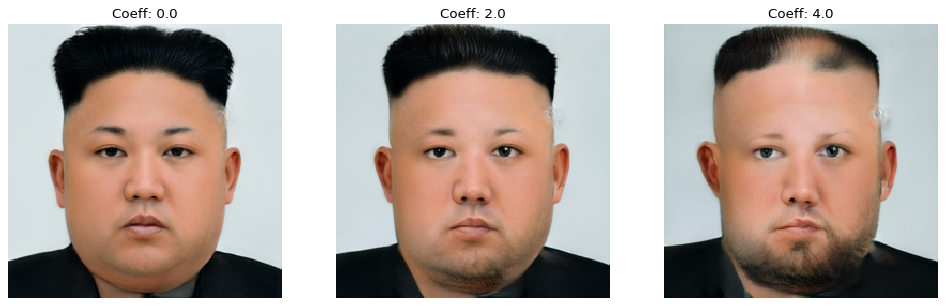

In [91]:
move_and_show(kim, gender_direction, [0, 2, 4])

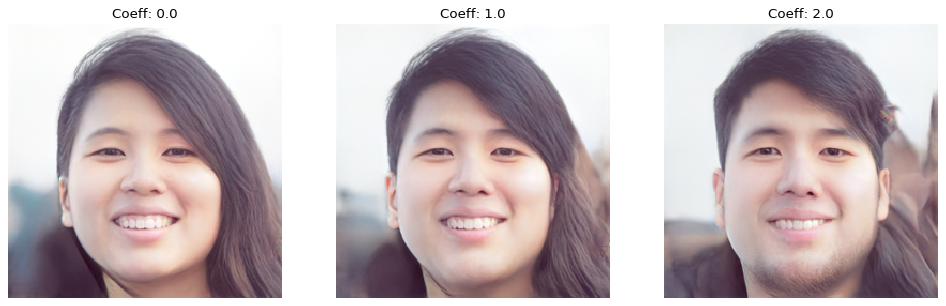

In [50]:
move_and_show(kaileng, gender_direction, [0, 1, 2])

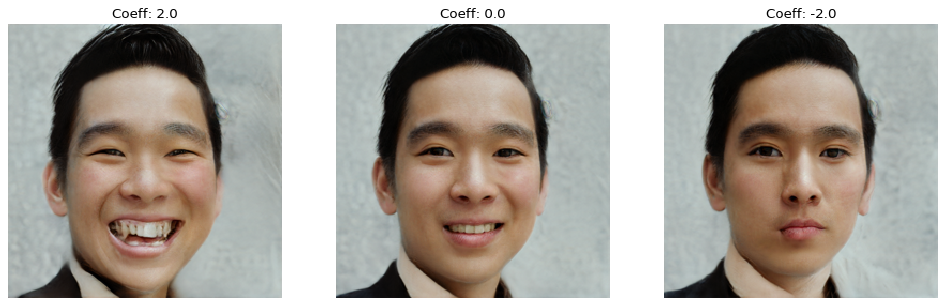

In [74]:
move_and_show(my, smile_direction, [2, 0, -2])

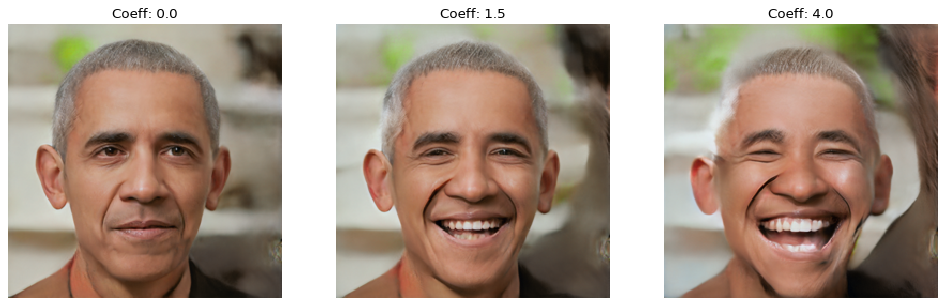

In [72]:
move_and_show(obama, smile_direction, [0, 1.5, 4])

#Character Fusion

We can also try mixing characters together to find an "average" of the two. The easiest way to do this is to simply take an average of the two latent vectors and generate an image using the average latent vector. You can also adjust how much of each character you want by changing `alpha`.


Now for the moment of truth -- Let's see what the future protector of the realm will look like!

In [ ]:
def move_and_show(latent_vector, direction, coeffs):
    fig,ax = plt.subplots(1, len(coeffs), figsize=(15, 10), dpi=80)
    for i, coeff in enumerate(coeffs):
        new_latent_vector = latent_vector.copy()
        new_latent_vector[:8] = (latent_vector + coeff*direction)[:8]
        ax[i].imshow(generate_image(new_latent_vector))
        ax[i].set_title('Coeff: %0.1f' % coeff)
    [x.axis('off') for x in ax]
    plt.show()

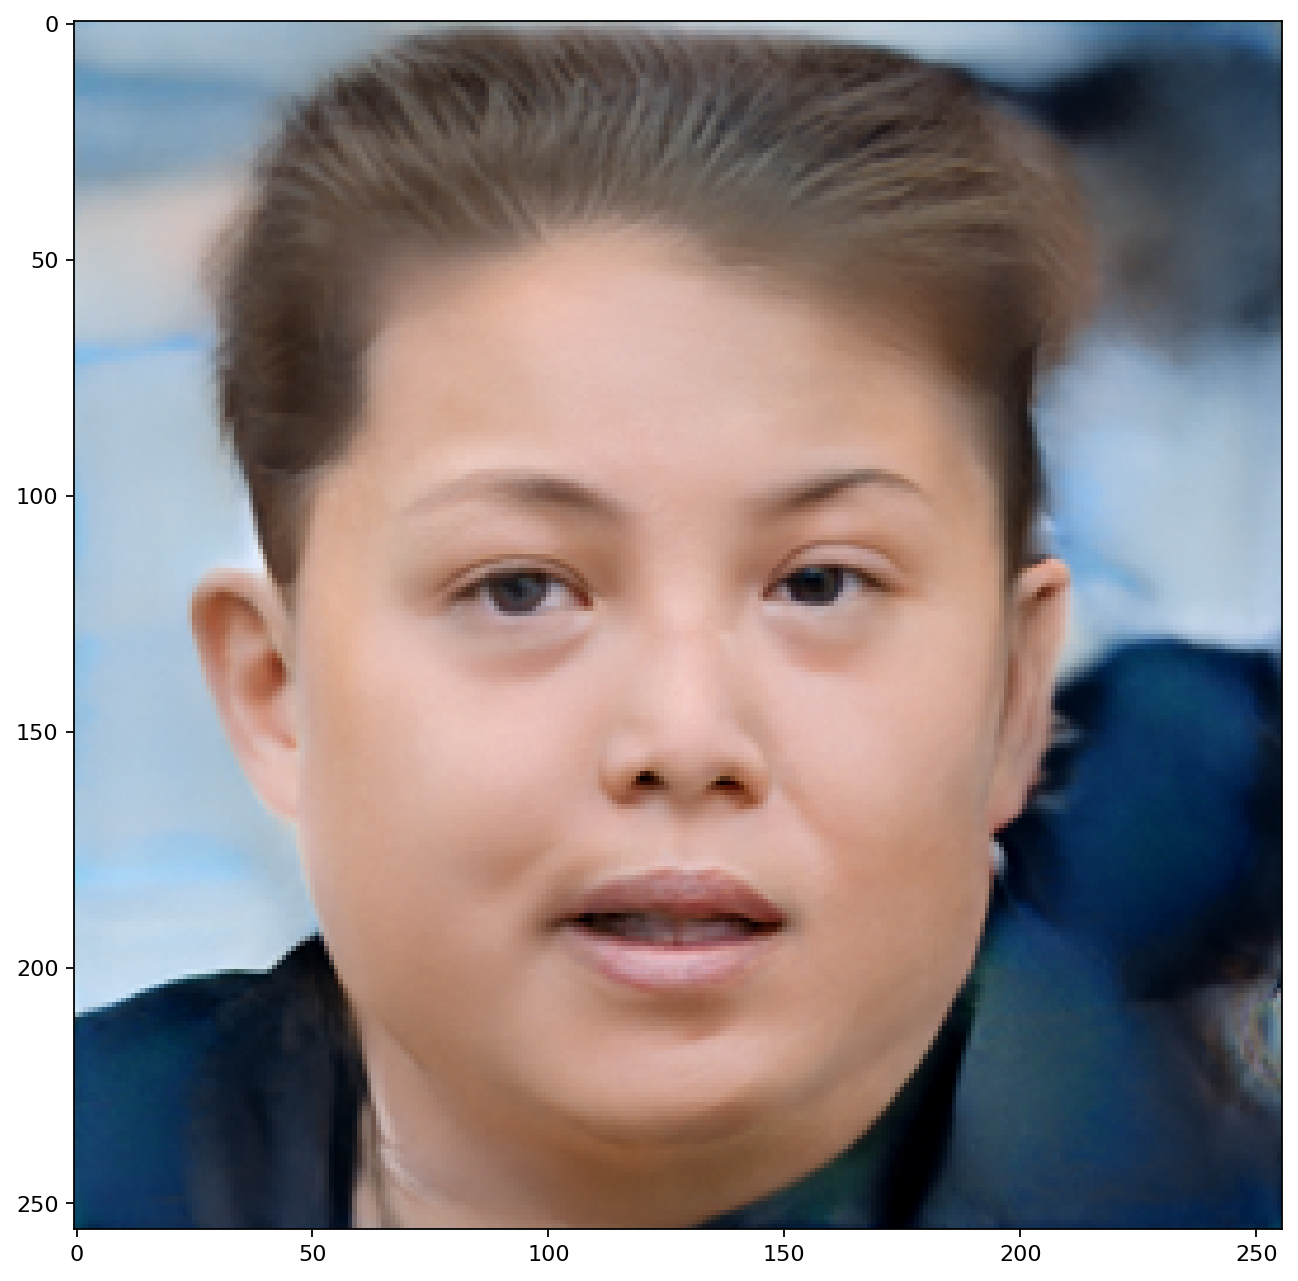

In [110]:
alpha = 0.5
char1 = trump
char2 = kim
mix = (((alpha)*char1)+((1-alpha)*char2))
mix = mix+age_direction*3
image = mix

fig,ax = plt.subplots(1, 1, figsize=(15, 10), dpi=160)
ax.imshow(generate_image(image))


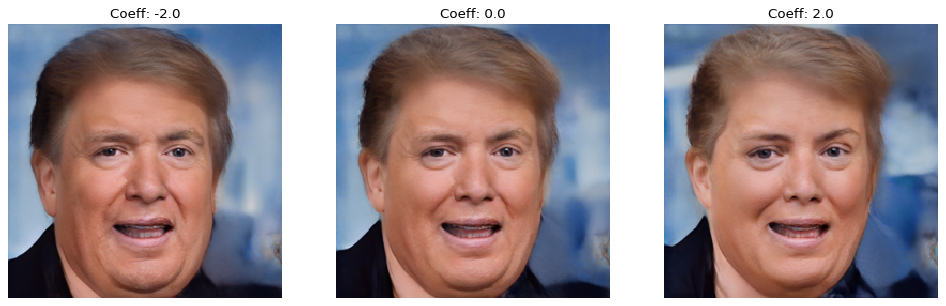

In [60]:
alpha = 0.8

mix = (((alpha)*trump)+((1-alpha)*kim))
move_and_show(mix, age_direction, [-2, 0, 2])

In [30]:
def draw_style_mixing_figure(png, Gs, w, h, src_dlatents, dst_dlatents, style_ranges):
    print(png)
    #src_dlatents = Gs.components.mapping.run(src_latents, None) # [seed, layer, component]
    #dst_dlatents = Gs.components.mapping.run(dst_latents, None)
    src_images = Gs.components.synthesis.run(src_dlatents, randomize_noise=False, **synthesis_kwargs)
    dst_images = Gs.components.synthesis.run(dst_dlatents, randomize_noise=False, **synthesis_kwargs)

    canvas = PIL.Image.new('RGB', (w * (len(src_dlatents) + 1), h * (len(dst_dlatents) + 1)), 'white')
    for col, src_image in enumerate(list(src_images)):
        canvas.paste(PIL.Image.fromarray(src_image, 'RGB'), ((col + 1) * w, 0))
    for row, dst_image in enumerate(list(dst_images)):
        canvas.paste(PIL.Image.fromarray(dst_image, 'RGB'), (0, (row + 1) * h))
        row_dlatents = np.stack([dst_dlatents[row]] * len(src_dlatents))
        row_dlatents[:, style_ranges[row]] = src_dlatents[:, style_ranges[row]]
        row_images = Gs.components.synthesis.run(row_dlatents, randomize_noise=False, **synthesis_kwargs)
        for col, image in enumerate(list(row_images)):
            canvas.paste(PIL.Image.fromarray(image, 'RGB'), ((col + 1) * w, (row + 1) * h))
    canvas.save(png)
    return canvas.resize((512,512))

results/style-mixing.png


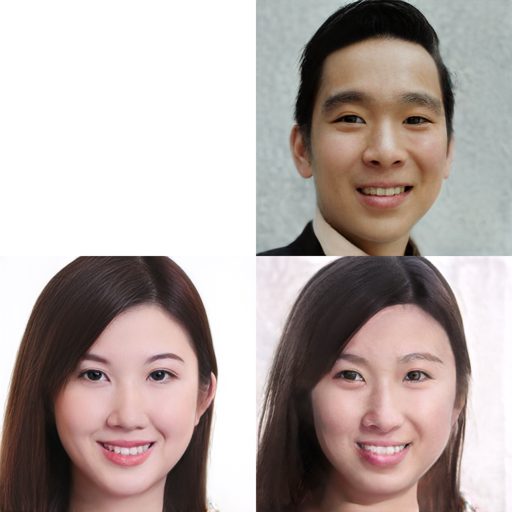

In [32]:
img_1 = my 
img_2 = yq
filename = 'stylename.png'

tflib.init_tf()
synthesis_kwargs = dict(output_transform=dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True), minibatch_size=1)
_Gs_cache = dict()

draw_style_mixing_figure(os.path.join(config.result_dir, filename), Gs, w=1024, h=1024, src_dlatents=img_1.reshape((1, 18, 512)), dst_dlatents=img_2.reshape((1, 18, 512)), style_ranges=[range(6,14)])

# Interpolation Videos


In [32]:
duration_sec = 5.0
smoothing_sec = 1.0
mp4_fps = 20
num_frames = int(np.rint(duration_sec * mp4_fps))

In [35]:
def generate_image_for_video(latent_vector):
    latent_vector = latent_vector.reshape((1, 18, 512))
    generator.set_dlatents(latent_vector)
    img_array = generator.generate_images()[0]

    return img_array
  

def move_for_video(latent_vector, direction, coeff):  
  new_latent_vector = latent_vector.copy()
  new_latent_vector[:8] = (latent_vector + coeff*direction)[:8]
  
  img_array = generate_image(new_latent_vector)
  
  return img_array

In [83]:
duration_sec = 5.0
smoothing_sec = 1.0
mp4_fps = 20
num_frames = int(np.rint(duration_sec * mp4_fps))

# # If you're interpolating between two characters, set these characters here
# #char1 = my
# #char2 = tq

# # This creates an nd array that stores all the image frames fot cross-character interpolation
# #src_images = np.stack(generate_image_for_video((0.01*alpha*char2)+((1-(0.01*alpha))*char1)) for alpha in range (100))


# # Uncomment the next line if you want to do a character transforation video, and choose the arguments as per your requirement
src_images = np.stack(move_for_video(my, gender_direction, (-0.016*alpha)) for alpha in range (0,100))


def make_frame(t):
    frame_idx = int(np.clip(np.round(t * mp4_fps), 0, num_frames - 1))
    src_image = src_images[frame_idx]
    return np.array(src_image)

# Generate video.
import moviepy.editor
mp4_file = 'results/mylee_female.mp4'
mp4_codec = 'libx264'
mp4_bitrate = '5M'

video_clip = moviepy.editor.VideoClip(make_frame, duration=duration_sec)
video_clip.write_videofile(mp4_file, fps=mp4_fps, codec=mp4_codec, bitrate=mp4_bitrate)

t:   0%|          | 0/100 [00:00<?, ?it/s, now=None]

Moviepy - Building video results/mylee_female.mp4.
Moviepy - Writing video results/mylee_female.mp4



Moviepy - Done !
Moviepy - video ready results/mylee_female.mp4


In [59]:
duration_sec = 10.0
smoothing_sec = 1.0
mp4_fps = 20
num_frames = int(np.rint(duration_sec * mp4_fps))

#If you're interpolating between two characters, set these characters here
char1 = my
char2 = yq
char3 = kaileng

# This creates an nd array that stores all the image frames fot cross-character interpolation
src_images_1 = np.stack(generate_image_for_video((0.01*alpha*char2)+((1-(0.01*alpha))*char1)) for alpha in range (100))
src_images_2 = np.stack(generate_image_for_video((0.01*alpha*char3)+((1-(0.01*alpha))*char2)) for alpha in range (100))
src_images = np.concatenate((src_images_1, src_images_2))

# Uncomment the next line if you want to do a character transforation video, and choose the arguments as per your requirement
#src_images = np.stack(move_for_video(kim, smile_direction, (0.04*alpha)) for alpha in range (0,100))

def make_frame(t):
    frame_idx = int(np.clip(np.round(t * mp4_fps), 0, num_frames - 1))
    src_image = src_images[frame_idx]
    return np.array(src_image)

# Generate video.
import moviepy.editor
mp4_file = 'results/yq_to_my_to_kl.mp4'
mp4_codec = 'libx264'
mp4_bitrate = '5M'

video_clip = moviepy.editor.VideoClip(make_frame, duration=duration_sec)
video_clip.write_videofile(mp4_file, fps=mp4_fps, codec=mp4_codec, bitrate=mp4_bitrate)

t:   0%|          | 0/200 [00:00<?, ?it/s, now=None]

Moviepy - Building video results/yq_to_my_to_kl.mp4.
Moviepy - Writing video results/yq_to_my_to_kl.mp4



Moviepy - Done !
Moviepy - video ready results/yq_to_my_to_kl.mp4
